<a href="https://colab.research.google.com/github/yuvrajrajput/Machine-learning-/blob/main/linear_regression_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Complete Linear Regression Tutorial: Scikit-learn vs TensorFlow
# ================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
print("=" * 80)
print("LINEAR REGRESSION TUTORIAL: SCIKIT-LEARN vs TENSORFLOW")
print("=" * 80)

LINEAR REGRESSION TUTORIAL: SCIKIT-LEARN vs TENSORFLOW


In [ ]:
# ===================================================================
# STEP 1: DATA LOADING AND EXPLORATION
# ===================================================================
print("\n1. DATA LOADING AND EXPLORATION")
print("-" * 40)


1. DATA LOADING AND EXPLORATION
----------------------------------------


In [ ]:
# Load California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [ ]:
# Create DataFrame for better visualization
feature_names = housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(feature_names)}")
print(f"Target: House value in hundreds of thousands of dollars")

Dataset shape: (20640, 9)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: House value in hundreds of thousands of dollars


In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Display basic statistics
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945

In [ ]:
# Check for missing values
print(f"\nMissing values: {df.isnull().sum().sum()}")


Missing values: 0


In [ ]:
# ===================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ===================================================================
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 40)



2. EXPLORATORY DATA ANALYSIS
----------------------------------------


In [ ]:
# Correlation analysis
print("Correlation with target variable:")
correlations = df.corr()['target'].sort_values(ascending=False)
print(correlations)

# Visualizations
plt.figure(figsize=(15, 12))

Correlation with target variable:
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


<Figure size 1500x1200 with 0 Axes>

<Figure size 1500x1200 with 0 Axes>

Text(0.5, 1.0, 'Feature Correlation Heatmap')

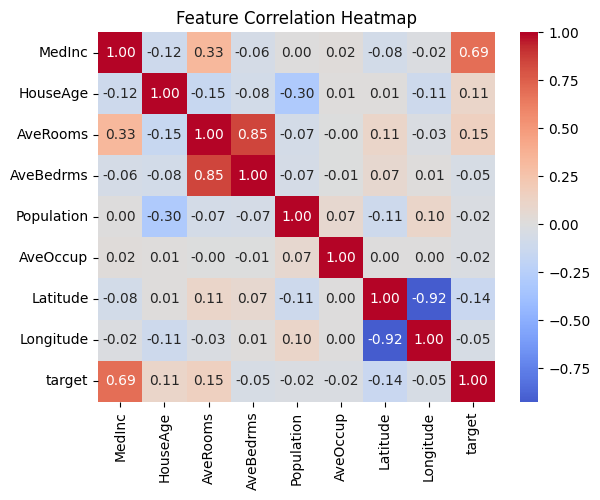

In [ ]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')

Text(0.5, 1.0, 'Target Variable Distribution')

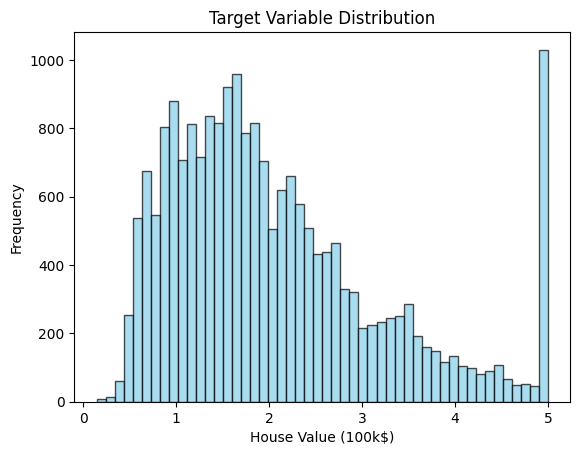

In [ ]:
# Distribution of target variable
plt.hist(y, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('House Value (100k$)')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')

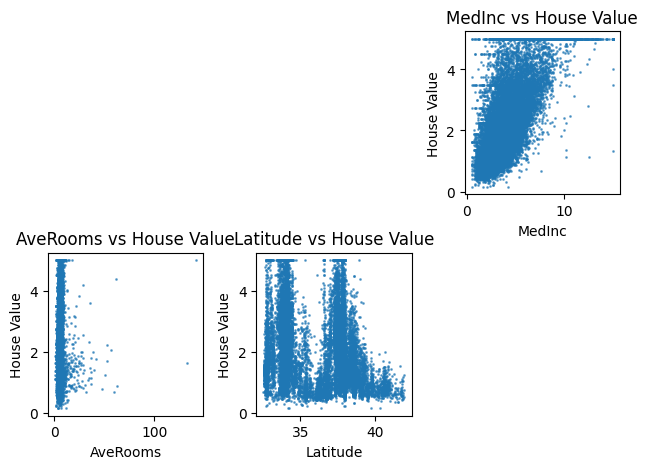

In [ ]:
# Scatter plots of most correlated features
top_features = correlations.abs().sort_values(ascending=False)[1:4].index

for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+3)
    plt.scatter(df[feature], df['target'], alpha=0.6, s=1)
    plt.xlabel(feature)
    plt.ylabel('House Value')
    plt.title(f'{feature} vs House Value')

plt.tight_layout()
plt.show()

In [ ]:
# ===================================================================
# STEP 3: DATA PREPROCESSING
# ===================================================================
print("\n3. DATA PREPROCESSING")
print("-" * 40)


3. DATA PREPROCESSING
----------------------------------------


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 16512 samples
Testing set size: 4128 samples
Number of features: 8


In [ ]:
# Feature scaling (important for neural networks and some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed:")
print(f"Original feature ranges: {X_train.min(axis=0)} to {X_train.max(axis=0)}")
# Format the scaled feature ranges by converting each element to a string with 3 decimal places
min_scaled = X_train_scaled.min(axis=0)
max_scaled = X_train_scaled.max(axis=0)
# Join the formatted elements into strings
min_scaled_str = ', '.join([f'{x:.3f}' for x in min_scaled])
max_scaled_str = ', '.join([f'{x:.3f}' for x in max_scaled])

print(f"Scaled feature ranges: [{min_scaled_str}] to [{max_scaled_str}]")


Feature scaling completed:
Original feature ranges: [   0.4999        1.            0.88888889    0.33333333    3.
    0.69230769   32.55       -124.35      ] to [ 1.50001000e+01  5.20000000e+01  1.41909091e+02  2.56363636e+01
  3.56820000e+04  1.24333333e+03  4.19500000e+01 -1.14310000e+02]
Scaled feature ranges: [-1.775, -2.191, -1.904, -1.762, -1.252, -0.208, -1.448, -2.377] to [5.839, 1.856, 57.167, 56.647, 30.127, 107.116, 2.952, 2.629]


In [ ]:
# ===================================================================
# STEP 4: LINEAR REGRESSION WITH SCIKIT-LEARN
# ===================================================================
print("\n4. LINEAR REGRESSION WITH SCIKIT-LEARN")
print("-" * 40)


4. LINEAR REGRESSION WITH SCIKIT-LEARN
----------------------------------------


In [ ]:
# Initialize and train the model
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Model training completed!")

Training Linear Regression model...
Model training completed!


In [ ]:
# Make predictions
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
# Model coefficients and intercept
print("\nModel Parameters:")
print(f"Intercept: {lr_model.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(feature_names, lr_model.coef_):
    print(f"  {feature}: {coef:.4f}")


Model Parameters:
Intercept: -37.0233
Coefficients:
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337


In [ ]:
# Calculate metrics
train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

In [ ]:
print("\nScikit-learn Linear Regression Performance:")
print(f"Training MSE: {train_mse_lr:.4f}")
print(f"Testing MSE: {test_mse_lr:.4f}")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Training MAE: {train_mae_lr:.4f}")
print(f"Testing MAE: {test_mae_lr:.4f}")


Scikit-learn Linear Regression Performance:
Training MSE: 0.5179
Testing MSE: 0.5559
Training R²: 0.6126
Testing R²: 0.5758
Training MAE: 0.5286
Testing MAE: 0.5332


In [ ]:
# ===================================================================
# STEP 5: LINEAR REGRESSION WITH TENSORFLOW
# ===================================================================
print("\n5. LINEAR REGRESSION WITH TENSORFLOW")
print("-" * 40)


5. LINEAR REGRESSION WITH TENSORFLOW
----------------------------------------


In [ ]:
# Build the neural network model
print("Building TensorFlow model...")
tf_model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='linear')
])

Building TensorFlow model...


In [ ]:
# Compile the model
tf_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

In [ ]:
print("Model architecture:")
tf_model.summary()

Model architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
print("\nTraining TensorFlow model...")
history = tf_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=0  # Set to 1 to see training progress
)

print("TensorFlow model training completed!")


Training TensorFlow model...


In [ ]:

# Make predictions
y_train_pred_tf = tf_model.predict(X_train_scaled, verbose=0).flatten()
y_test_pred_tf = tf_model.predict(X_test_scaled, verbose=0).flatten()

In [ ]:
# Calculate metrics
train_mse_tf = mean_squared_error(y_train, y_train_pred_tf)
test_mse_tf = mean_squared_error(y_test, y_test_pred_tf)
train_r2_tf = r2_score(y_train, y_train_pred_tf)
test_r2_tf = r2_score(y_test, y_test_pred_tf)
train_mae_tf = mean_absolute_error(y_train, y_train_pred_tf)
test_mae_tf = mean_absolute_error(y_test, y_test_pred_tf)

In [ ]:
print("\nTensorFlow Linear Regression Performance:")
print(f"Training MSE: {train_mse_tf:.4f}")
print(f"Testing MSE: {test_mse_tf:.4f}")
print(f"Training R²: {train_r2_tf:.4f}")
print(f"Testing R²: {test_r2_tf:.4f}")
print(f"Training MAE: {train_mae_tf:.4f}")
print(f"Testing MAE: {test_mae_tf:.4f}")


TensorFlow Linear Regression Performance:
Training MSE: 0.5182
Testing MSE: 0.5575
Training R²: 0.6124
Testing R²: 0.5746
Training MAE: 0.5289
Testing MAE: 0.5340


In [ ]:
# ===================================================================
# STEP 6: MODEL COMPARISON AND VISUALIZATION
# ===================================================================
print("\n6. MODEL COMPARISON AND VISUALIZATION")
print("-" * 40)


6. MODEL COMPARISON AND VISUALIZATION
----------------------------------------


In [ ]:
# Compare models
comparison_df = pd.DataFrame({
    'Metric': ['Training MSE', 'Testing MSE', 'Training R²', 'Testing R²', 'Training MAE', 'Testing MAE'],
    'Scikit-learn': [train_mse_lr, test_mse_lr, train_r2_lr, test_r2_lr, train_mae_lr, test_mae_lr],
    'TensorFlow': [train_mse_tf, test_mse_tf, train_r2_tf, test_r2_tf, train_mae_tf, test_mae_tf]
})

In [ ]:
print("Model Comparison:")
print(comparison_df.round(4))

Model Comparison:
         Metric  Scikit-learn  TensorFlow
0  Training MSE        0.5179      0.5182
1   Testing MSE        0.5559      0.5575
2   Training R²        0.6126      0.6124
3    Testing R²        0.5758      0.5746
4  Training MAE        0.5286      0.5289
5   Testing MAE        0.5332      0.5340


In [ ]:
# Visualizations
plt.figure(figsize=(20, 15))


<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

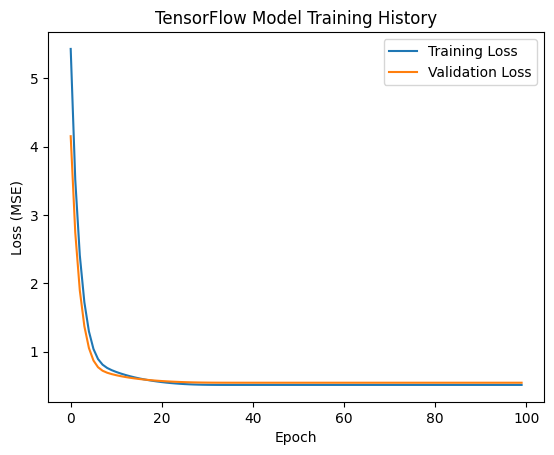

In [ ]:
# 1. Training history for TensorFlow model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

Text(0.5, 1.0, 'Scikit-learn: Actual vs Predicted')

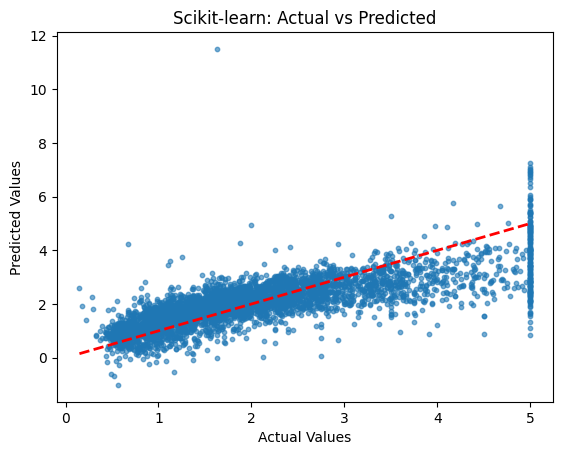

In [ ]:
# 2. Actual vs Predicted (Scikit-learn)
plt.scatter(y_test, y_test_pred_lr, alpha=0.6, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scikit-learn: Actual vs Predicted')

Text(0.5, 1.0, 'TensorFlow: Actual vs Predicted')

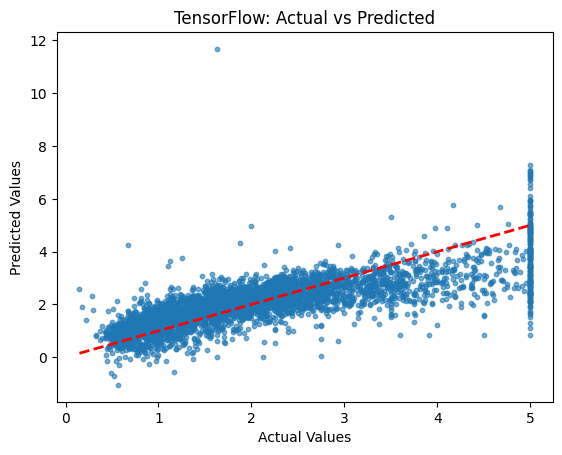

In [ ]:
# 3. Actual vs Predicted (TensorFlow)
plt.scatter(y_test, y_test_pred_tf, alpha=0.6, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('TensorFlow: Actual vs Predicted')

Text(0.5, 1.0, 'Scikit-learn: Residuals Plot')

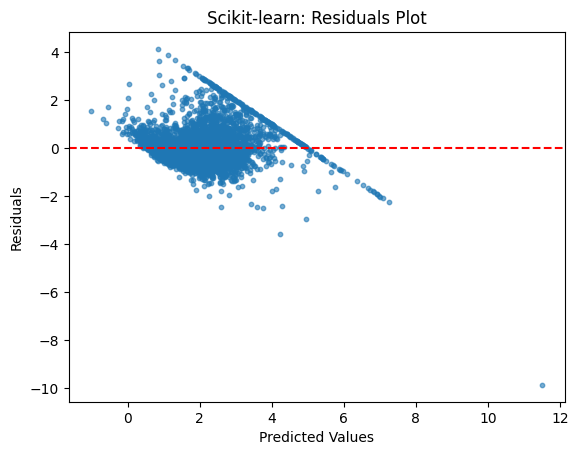

In [ ]:
# 4. Residuals plot (Scikit-learn)
residuals_lr = y_test - y_test_pred_lr
plt.scatter(y_test_pred_lr, residuals_lr, alpha=0.6, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scikit-learn: Residuals Plot')

Text(0.5, 1.0, 'TensorFlow: Residuals Plot')

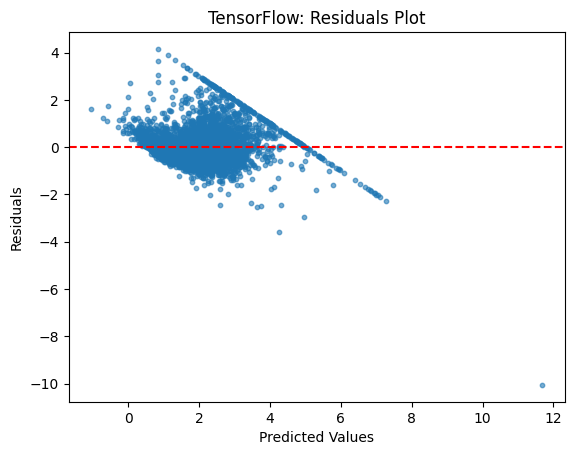

In [ ]:
# 5. Residuals plot (TensorFlow)
residuals_tf = y_test - y_test_pred_tf
plt.scatter(y_test_pred_tf, residuals_tf, alpha=0.6, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('TensorFlow: Residuals Plot')

Text(0.5, 1.0, 'Scikit-learn: Residuals Distribution')

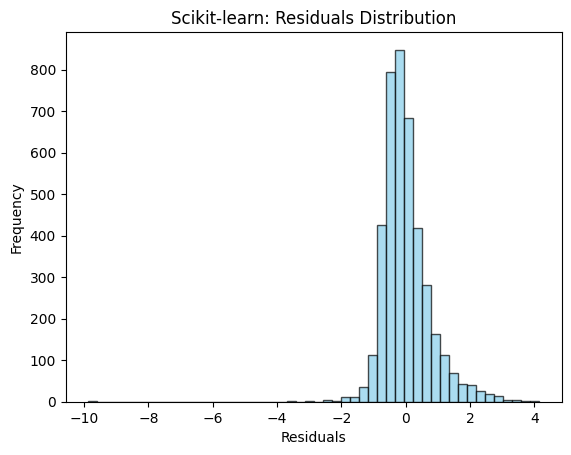

In [ ]:
# 6. Distribution of residuals (Scikit-learn)
plt.hist(residuals_lr, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Scikit-learn: Residuals Distribution')

Text(0.5, 1.0, 'TensorFlow: Residuals Distribution')

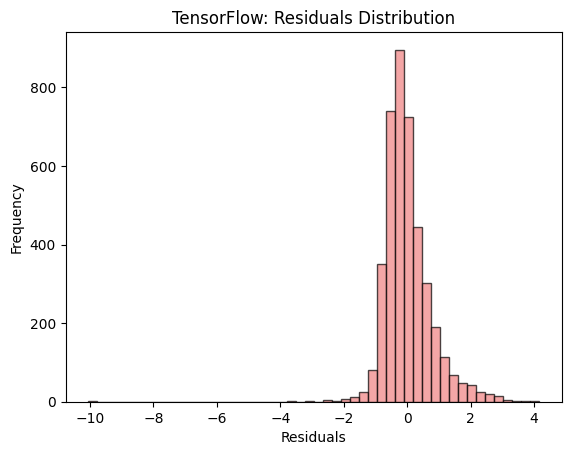

In [ ]:
# 7. Distribution of residuals (TensorFlow)
plt.hist(residuals_tf, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('TensorFlow: Residuals Distribution')

Text(0.5, 1.0, 'Feature Importance (Scikit-learn)')

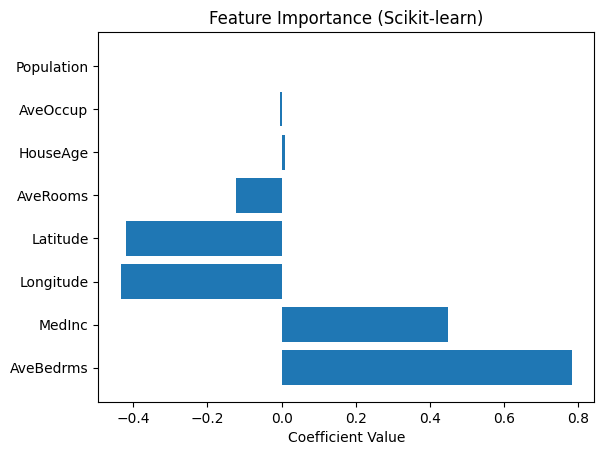

In [ ]:
# 8. Feature importance (Scikit-learn coefficients)
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': lr_model.coef_
})
feature_importance = feature_importance.reindex(
    feature_importance.coefficient.abs().sort_values(ascending=False).index
)
plt.barh(feature_importance.feature, feature_importance.coefficient)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Scikit-learn)')

In [ ]:
# 9. Model comparison bar chart
metrics = ['Test MSE', 'Test R²', 'Test MAE']
sklearn_scores = [test_mse_lr, test_r2_lr, test_mae_lr]
tf_scores = [test_mse_tf, test_r2_tf, test_mae_tf]

x = np.arange(len(metrics))
width = 0.35

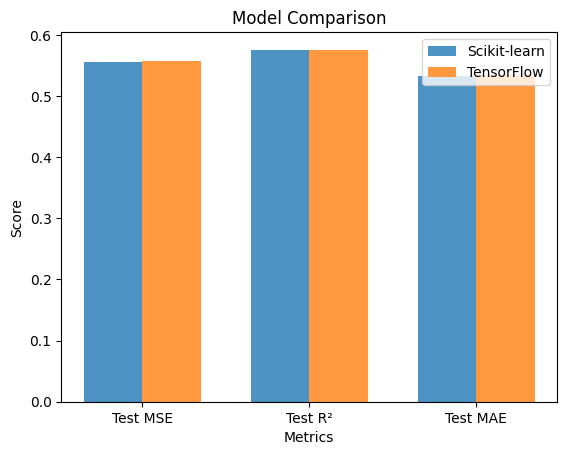

In [ ]:
plt.bar(x - width/2, sklearn_scores, width, label='Scikit-learn', alpha=0.8)
plt.bar(x + width/2, tf_scores, width, label='TensorFlow', alpha=0.8)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, metrics)
plt.legend()

Text(0.5, 1.0, 'Q-Q Plot: Scikit-learn Residuals')

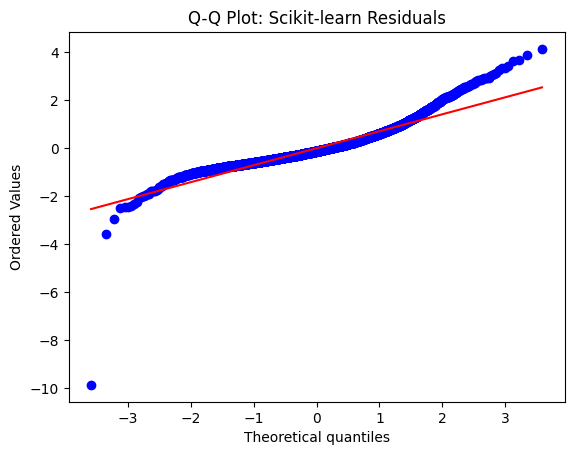

In [ ]:
# 10. Q-Q plot for residuals (Scikit-learn)
from scipy import stats
stats.probplot(residuals_lr, dist="norm", plot=plt)
plt.title('Q-Q Plot: Scikit-learn Residuals')

Text(0.5, 1.0, 'Q-Q Plot: TensorFlow Residuals')

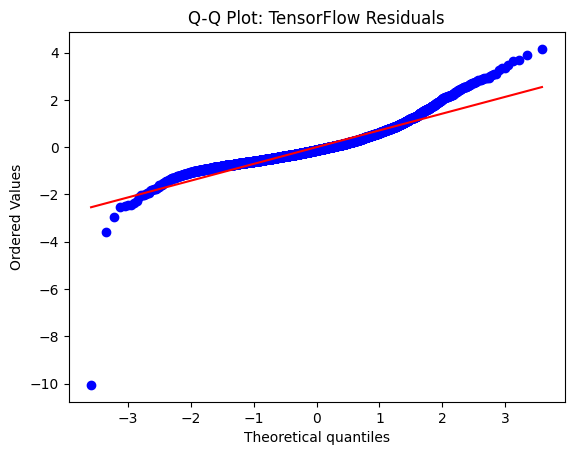

In [ ]:
# 11. Q-Q plot for residuals (TensorFlow)
stats.probplot(residuals_tf, dist="norm", plot=plt)
plt.title('Q-Q Plot: TensorFlow Residuals')

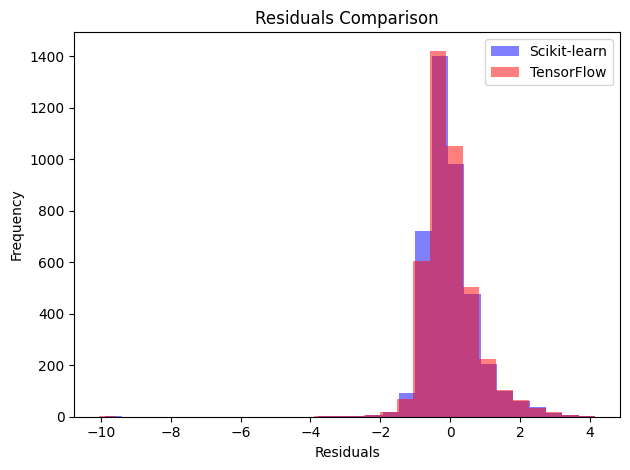

In [ ]:
# 12. Error distribution comparison

plt.hist(residuals_lr, bins=30, alpha=0.5, label='Scikit-learn', color='blue')
plt.hist(residuals_tf, bins=30, alpha=0.5, label='TensorFlow', color='red')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Comparison')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# ===================================================================
# STEP 7: MODEL INTERPRETATION AND INSIGHTS
# ===================================================================
print("\n7. MODEL INTERPRETATION AND INSIGHTS")
print("-" * 40)



7. MODEL INTERPRETATION AND INSIGHTS
----------------------------------------


In [ ]:
print("Key Insights:")
print("1. Feature Importance (based on absolute coefficient values):")
feature_importance_sorted = sorted(zip(feature_names, np.abs(lr_model.coef_)),
                                 key=lambda x: x[1], reverse=True)
for i, (feature, importance) in enumerate(feature_importance_sorted, 1):
    print(f"   {i}. {feature}: {importance:.4f}")

Key Insights:
1. Feature Importance (based on absolute coefficient values):
   1. AveBedrms: 0.7831
   2. MedInc: 0.4487
   3. Longitude: 0.4337
   4. Latitude: 0.4198
   5. AveRooms: 0.1233
   6. HouseAge: 0.0097
   7. AveOccup: 0.0035
   8. Population: 0.0000


In [ ]:
print(f"\n2. Model Performance:")
print(f"   - Both models achieve similar performance (R² ≈ {test_r2_lr:.3f})")
print(f"   - Scikit-learn is simpler and faster for basic linear regression")
print(f"   - TensorFlow provides more flexibility for complex models")


2. Model Performance:
   - Both models achieve similar performance (R² ≈ 0.576)
   - Scikit-learn is simpler and faster for basic linear regression
   - TensorFlow provides more flexibility for complex models


In [ ]:
print(f"\n3. Model Assumptions Check:")
print(f"   - Linearity: Check scatter plots of features vs target")
print(f"   - Independence: Assumed based on data collection")
print(f"   - Homoscedasticity: Check residuals plots")
print(f"   - Normality: Check Q-Q plots and histograms of residuals")


3. Model Assumptions Check:
   - Linearity: Check scatter plots of features vs target
   - Independence: Assumed based on data collection
   - Homoscedasticity: Check residuals plots
   - Normality: Check Q-Q plots and histograms of residuals


In [ ]:
# ===================================================================
# STEP 8: MAKING PREDICTIONS ON NEW DATA
# ===================================================================
print("\n8. MAKING PREDICTIONS ON NEW DATA")
print("-" * 40)


8. MAKING PREDICTIONS ON NEW DATA
----------------------------------------


In [ ]:
# Create sample new data point
new_data = np.array([[8.0, 6.0, 5.0, 1.2, 3000, 3.5, 35.0, -120.0]])  # Sample house features
new_data_scaled = scaler.transform(new_data)

In [ ]:
# Make predictions
sklearn_prediction = lr_model.predict(new_data)[0]
tf_prediction = tf_model.predict(new_data_scaled, verbose=0)[0][0]

In [ ]:
print("Sample house features:")
for feature, value in zip(feature_names, new_data[0]):
    print(f"  {feature}: {value}")

Sample house features:
  MedInc: 8.0
  HouseAge: 6.0
  AveRooms: 5.0
  AveBedrms: 1.2
  Population: 3000.0
  AveOccup: 3.5
  Latitude: 35.0
  Longitude: -120.0


In [ ]:
print(f"\nPredicted house value:")
print(f"  Scikit-learn: ${sklearn_prediction:.2f} (hundreds of thousands)")
print(f"  TensorFlow: ${tf_prediction:.2f} (hundreds of thousands)")
print(f"  Difference: ${abs(sklearn_prediction - tf_prediction):.2f}")


Predicted house value:
  Scikit-learn: $4.28 (hundreds of thousands)
  TensorFlow: $4.33 (hundreds of thousands)
  Difference: $0.05


In [ ]:
print("\n" + "=" * 80)
print("TUTORIAL COMPLETED SUCCESSFULLY!")
print("=" * 80)


TUTORIAL COMPLETED SUCCESSFULLY!
